Data Analysis HW2 - Decision Tree 

In [1]:
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

這次選用的 Dataset 為 Heart Disease UCI
透過分析性別、年齡、血壓、膽固醇等指標，結合 Decision Tree
試著預測受測者是否有心血管疾病。

將原始資料隨機打亂後，分離 training / testing data

In [2]:
pd_data = pd.read_csv('./heart.csv')
pd_data = pd_data.sample(frac=1).reset_index(drop=True)
pd_train = pd_data.head(260)
pd_test = pd_data.tail(40)
pd_data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
1,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
2,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
3,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
4,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1


In [3]:
pd_train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
1,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
2,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
3,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
4,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
5,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
6,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
7,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
8,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
9,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1


In [4]:
pd_test.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
294,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
295,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
296,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
297,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
298,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
299,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
300,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
301,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
302,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1


檢查資料，是否結果分佈過於極端或有 null 欄位須處理

In [5]:
pd_train['target'].value_counts()

1    142
0    118
Name: target, dtype: int64

In [6]:
pd_train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
y = pd_train['target'].values
pdd_train = pd_train
pddd_train = pd_train
pddd_train = pddd_train.drop('cp', 1)
pddd_train = pddd_train.drop('target', 1)
pdd_train = pdd_train.drop('target', 1)
y

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [8]:
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(pdd_train,y)
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, filled = True, feature_names = list(pdd_train),
                class_names = ['illness','healthy'],special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree1.pdf")

True

In [9]:
A = dtree.feature_importances_
column = pd_data.columns.tolist()
j = 0
for i in A:
    print(column[j],':',i)
    j+=1

age : 0.02947423234158351
sex : 0.056404635098021474
cp : 0.37609181358201965
trestbps : 0.017751963712556648
chol : 0.019604602269663894
fbs : 0.0
restecg : 0.0
thalach : 0.08443941387764564
exang : 0.04943646369500995
oldpeak : 0.0669718069244801
slope : 0.030496047975032706
ca : 0.1544967956100878
thal : 0.11483222491389855


In [10]:
y_test = pd_test['target'].values
x_test = pd_test.drop('target', 1)

y_predict = dtree.predict(x_test)

y_predict

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
from  sklearn.metrics  import accuracy_score
from sklearn.ensemble import RandomForestClassifier
accuracy_score(y_test, y_predict)

0.725

In [12]:
from sklearn.model_selection import train_test_split #for data splitting
X_train, X_test, y_train, y_test = train_test_split(pd_train.drop('target', 1), 
                                                    pd_train['target'], test_size = .2, random_state=10)
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

/home/acnes2/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'healthy'
y_train_str[y_train_str == '1'] = 'illness'
y_train_str = y_train_str.values

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)
from subprocess import call
from IPython.display import Image
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree1.png', '-Gdpi=600'])
Image(filename = 'tree1.png')

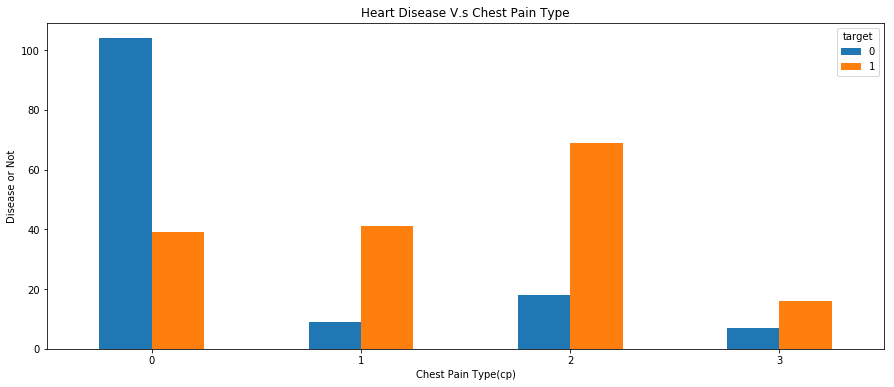

In [14]:
pd.crosstab(pd_data.cp,pd_data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease V.s Chest Pain Type')
plt.xlabel('Chest Pain Type(cp)')
plt.xticks(rotation = 0)
plt.ylabel('Disease or Not')
plt.show()

In [15]:
ddtree = DecisionTreeClassifier(max_depth=4)
ddtree.fit(pddd_train,y)
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, filled = True, 
                class_names = ['illness','healthy'],special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree2.pdf")

True

In [16]:
A = ddtree.feature_importances_
column = pddd_train.columns.tolist()
j = 0
for i in range(len(A)):
    print(column[j],':',A[i])
    j+=1

age : 0.08193790647680319
sex : 0.06025302859980263
trestbps : 0.016267340117372353
chol : 0.010323504305255523
fbs : 0.0
restecg : 0.0
thalach : 0.0
exang : 0.05337135006354885
oldpeak : 0.12660300008001363
slope : 0.1370501690285109
ca : 0.3490643153867454
thal : 0.16512938594194745


In [17]:
y_test = pd_test['target'].values
x_test = pd_test.drop('target', 1)
x_test = x_test.drop('cp', 1)
y_predict = ddtree.predict(x_test)

y_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [18]:
accuracy_score(y_test, y_predict)

0.825